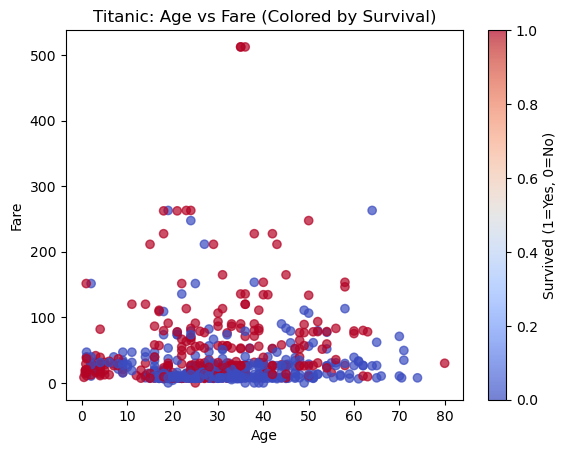

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Drop missing values for chosen columns
titanic = titanic.dropna(subset=["age", "fare"])

# Scatter plot (Age vs Fare)
plt.scatter(titanic["age"], titanic["fare"], c=titanic["survived"], cmap="coolwarm", alpha=0.7)
plt.title("Titanic: Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label="Survived (1=Yes, 0=No)")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_8924\2274550917.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="rating", data=movies, palette="magma")


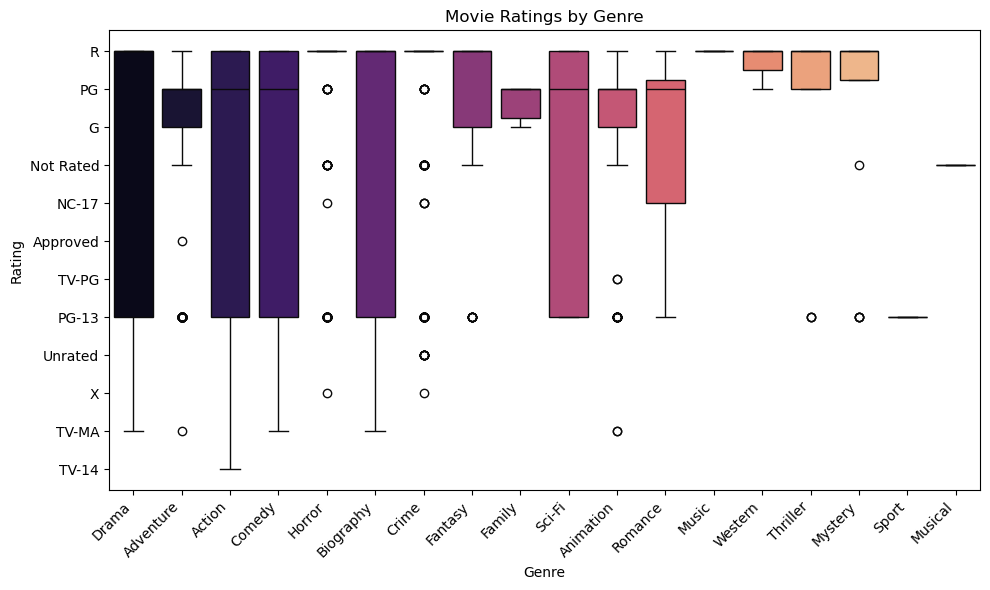

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
movies = pd.read_csv("movies.csv")

# Drop missing values
movies = movies.dropna(subset=["rating", "genre"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="genre", y="rating", data=movies, palette="magma")

# Rotate genre labels to avoid overlap
plt.xticks(rotation=45, ha="right")
plt.title("Movie Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [6]:
movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

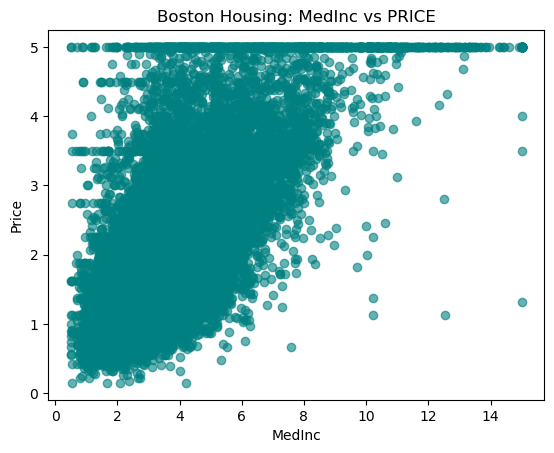

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset (handle deprecated Boston)
try:
    boston = datasets.load_boston()
    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df["PRICE"] = boston.target
except:
    from sklearn.datasets import fetch_california_housing
    cali = fetch_california_housing()
    df = pd.DataFrame(cali.data, columns=cali.feature_names)
    df["PRICE"] = cali.target

# Choose columns
x_col = "RM" if "RM" in df.columns else df.columns[0]
y_col = "PRICE"

plt.scatter(df[x_col], df[y_col], alpha=0.6, color="teal")
plt.title(f"Boston Housing: {x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel("Price")
plt.show()


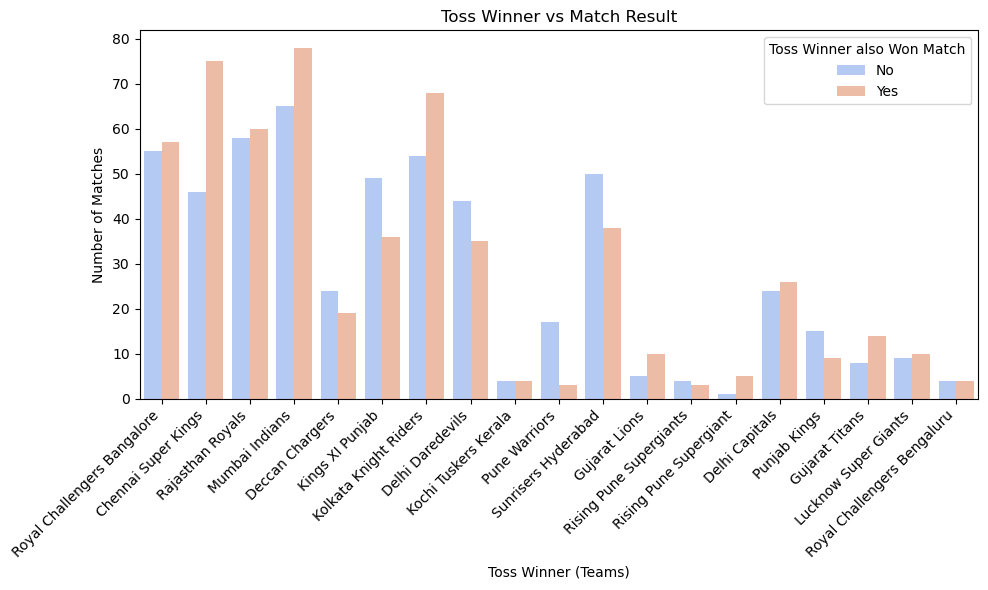

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
matches = pd.read_csv("matches.csv")

# Drop missing values
matches = matches.dropna(subset=["toss_winner", "winner"])

# Create a new column to check if toss_winner == winner
matches["toss_win_match_win"] = matches["toss_winner"] == matches["winner"]

# Plot toss winner vs match winner count
plt.figure(figsize=(10, 6))
sns.countplot(x="toss_winner", hue="toss_win_match_win", data=matches, palette="coolwarm")

# Improve label readability
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.title("Toss Winner vs Match Result")
plt.xlabel("Toss Winner (Teams)")
plt.ylabel("Number of Matches")
plt.legend(title="Toss Winner also Won Match", labels=["No", "Yes"])
plt.tight_layout()  # Prevent cutoff

plt.show()


In [10]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

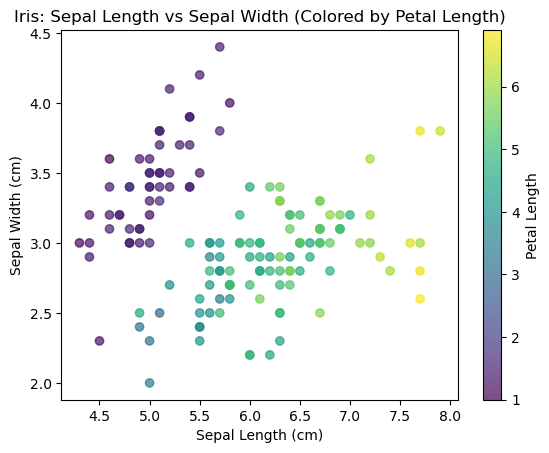

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = sns.load_dataset("iris")

# Scatter plot
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["petal_length"], cmap="viridis", alpha=0.7)
plt.title("Iris: Sepal Length vs Sepal Width (Colored by Petal Length)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.colorbar(label="Petal Length")
plt.show()


Columns: Index(['actorId', 'actorName', 'movieCount', 'ratingSum',
       'normalizedMovieRank', 'googleHits', 'normalizedGoogleRank',
       'normalizedRating'],
      dtype='object')


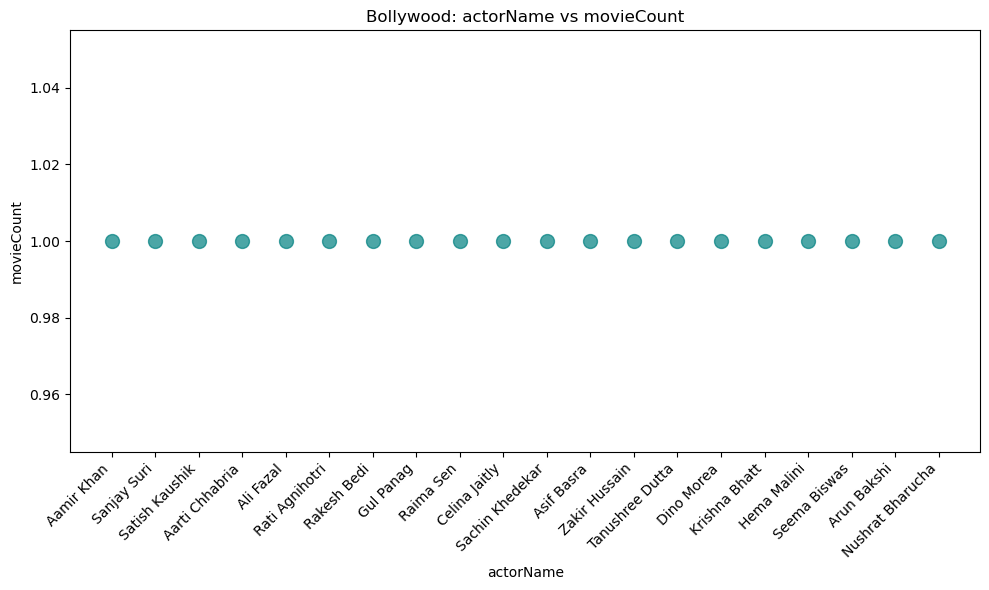

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Bollywood dataset
df = pd.read_csv("BollywoodActorRanking.csv")

# Check column names
print("Columns:", df.columns)

# Change the column name below according to your dataset
# Example: "actor", "lead_actor", or "actors"
actor_col = "actorName"  # change if needed

# Drop missing values
df = df.dropna(subset=[actor_col])

# Split multiple actors (if comma-separated)
df['movieCount'] = df[actor_col].apply(lambda x: [a.strip() for a in str(x).split(',')])

# Explode into one row per actor
df_exploded = df.explode('movieCount')

# Count movies per actor
actor_counts = df_exploded['movieCount'].value_counts().reset_index()
actor_counts.columns = ['actorName', 'movie_Count']

# Optionally, show top 20 actors only
top_actors = actor_counts.head(20)

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(top_actors['actorName'], top_actors['movie_Count'], color='teal', s=100, alpha=0.7)
plt.title("Bollywood: actorName vs movieCount")
plt.xlabel("actorName")
plt.ylabel("movieCount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
